# Lesson 5: Infinite Row of Vortices

## Superposition of many vortices:

In [13]:
# imports
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# vortex class definition
class Vortex:
    """
    class to represent a vortex for numerical aerodynamic analysis
    
    
    Attributes
    ----------
    strength: float
        strength of the vortex
    x: float
        x-coordinate of the vortex
    y: float
        y-coordinate of the vortex
        
    
    Methods
    -------
    velocity(X, Y)
    stream_function(X, Y)
    
    
    Example
    -------
    v = Vortex(5.0, 0.0, 0.0)
        -- creates a vortex with strength 5 and location (0,0)
    """
    
    def __init__(self, strength, x, y):
        """
        typical object instance creation
        
        
        Parameters
        ----------
        strength: float
            strength of the vortex
        x: float
            x-coordinate of the vortex
        y: float
            y-coordinate of the vortex
            
        Returns
        -------
        none
        """
        
        self.strength = strength
        self.x = x
        self.y = y
        
    def velocity(self, X, Y):
        """
        returns 2D numpy arrays of x and y velocity components
        
        Parameters
        ----------
        X: 2D numpy array of floats, as created by numpy.meshgrid()
            x-coordinates of mesh grid
        Y: 2D numpy array of floats, as created by numpy.meshgrid()
            y-coordinates of mesh grid
        
        Returns
        -------
        u, v: 2D numpy arrays containing x and y velocity components, respectively
        """
        
        u = +self.strength/(2*math.pi)*(Y - self.y)/((X - self.x)**2 + (Y - self.y)**2)
        v = -self.strength/(2*math.pi)*(X - self.x)/((X - self.x)**2 + (Y - self.y)**2)
        
        return u, v
    
    def stream_function(self, X, Y):
        """
        returns 2D numpy array of stream function values
        
        Parameters
        ----------
        X: 2D numpy array of floats, as created by numpy.meshgrid()
            x-coordinates of mesh grid
        Y: 2D numpy array of floats, as created by numpy.meshgrid()
            y-coordinates of mesh grid
        
        Returns
        -------
        psi: 2D numpy array of floats
            stream function values
        """
        
        psi = self.strength/(4*math.pi)*np.log((X - self.x)**2 + (Y - self.y)**2)
        
        return psi

In [49]:
# vortex row model using loop method

# create mesh grid
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -0.5, 0.5
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

# create vortex row
n_vorts = 1001
a = 0.4
vort_strength = 5.0
vort_row_x = np.linspace(-(n_vorts-1)*a/2, +(n_vorts-1)*a/2, n_vorts)
vort_row_y = np.zeros(n_vorts)

vort_list = [Vortex(vort_strength, vort_row_x[i], vort_row_y[i]) for i in np.arange(n_vorts)]

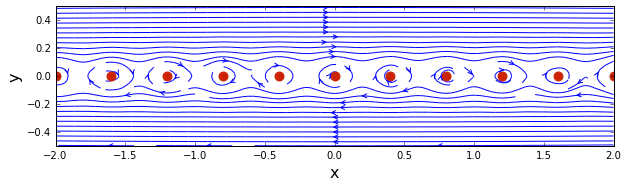

In [50]:
# calculate velocity field

u = np.zeros(np.shape(X))
v = np.zeros(np.shape(X))
count = 0

while count < len(vort_list):
    u_old = np.copy(u)
    v_old = np.copy(v)
    u, v = vort_list[count].velocity(X, Y)
    u += u_old
    v += v_old
    count += 1
    
# plot streamlines
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
for item in vort_list:
    plt.scatter(item.x, item.y, color='#CD2305', s=80, marker='o') 

## Infinite Row Model

$$u\left(x,y\right) = +\frac{\Gamma}{2a}\frac{\sinh{\left(\frac{2\pi y}{a}\right)}}{\cosh{\left(\frac{2\pi y}{a}\right)}-\cos{\left(\frac{2\pi x}{a}\right)}}$$

$$v\left(x,y\right) = +\frac{\Gamma}{2a}\frac{\sin{\left(\frac{2\pi x}{a}\right)}}{\cosh{\left(\frac{2\pi y}{a}\right)}-\cos{\left(\frac{2\pi x}{a}\right)}}$$

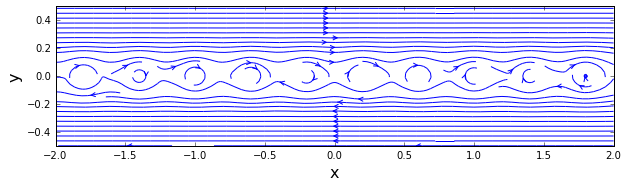

In [52]:
# compute velocity field
u_inf_row = vort_strength/(2*a)*np.sinh(2*math.pi*Y/a)/(np.cosh(2*math.pi*Y/a) - np.cos(2*math.pi*X/a))
v_inf_row = vort_strength/(2*a)*np.sin(2*math.pi*X/a)/(np.cosh(2*math.pi*Y/a) - np.cos(2*math.pi*X/a))

# plots
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_inf_row, v_inf_row, density=1, linewidth=1, arrowsize=1, arrowstyle='->');